# Load the final compiled dataset


In [0]:
import pandas as pd
import numpy as np
from pyspark.sql import functions as F


In [0]:
# Load the table

df = spark.table("hive_metastore.default.final_compiled_clean_no_outliers")
display(df)

In [0]:

# Convert to Pandas DataFrame
pandas_df = df.toPandas()

# Display the Pandas DataFrame
pandas_df.head()


In [0]:
pip install summarytools

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python 

In [0]:
from summarytools import dfSummary
dfSummary(pandas_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,job_id[int64],Mean (sd) : 3897331892.6 (68149153.1)min < med < max:921716.0 < 3902322956.5 < 3906267224.0IQR (CV) : 10108412.0 (57.2),"116,278 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABWklEQVR4nO3XQU7CUBiF0fcMQZi8piFhMSzCxboIdkNMOxDigLoCFBoUrzln+nqTf/BNWqdpKvDXPT36ALjG4tEH8H/UWtellOXM+cc0TcdLj0LlLmqt681m89Ja6+fsx3F8q7W+XopVqNzLsrXW73a7Y9d1p1uGwzCs9vt9fzgclqUUofLzuq47bbfb9xnT9VePfqaIIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIi+8+qLWuSinPv3AL2dr5fF4Mw7C6dXjN5hOFTCkW7hiMLQAAAABJRU5ErkJggg=="">",0(0.0%)
2,company_name[object],"1. liberty healthcare and rehabil2. the job network3. j. galt4. teksystems5. lowe's companies, inc.6. ingersoll rand7. capital one8. cogent communications9. dice10. insight global11. other","1,089 (0.9%)1,002 (0.9%)570 (0.5%)529 (0.5%)527 (0.5%)517 (0.4%)496 (0.4%)476 (0.4%)414 (0.4%)387 (0.3%)110,415 (94.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cwWoaUQCG0WuQ0GxGRPBhfIg8bB/CtxFxFk3Ixi5qd60JNP2k9pxVoZtZfIzTy/27OJ/PAwoPt34A/h9iIyM2MmIjIzYyYiMjNjJiIyM2MosxxtMYY5zP55cbPwt3brnZbJ7HGGOxWHwVHH/TwzRN62ma1mOMx1s/DPfNNxsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnO83y8/Pntpk/C3bNBILPwX2ZR8WYjY11FxrqKjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxpuNjMELGYMXMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGd9sZPyMkrGuImNdRcY3GxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMq6Fk7GuIuPNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMjYIZKyryHizkbGuImNdRcbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYxvNjJ+RslYV5GxriLjm42M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnXwslYV5HxZiNj8ELG4IWMow8yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2RcCydj8ELm55vNlXA+w9u1X8jlZrN5vmwQ4I/M83y8NpxaTtO03u12L6vV6rV+OO7H6XT6st/v14fD4XGM8evYxhhjtVq9brfbb+nTcY+erv2lczYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyyzF+XA+59YPwb/tIQ8t5no/7/X493rkeAu+5jKd+O5xyLZzPdPVauMELGf9AICM2MmIjIzYyYiMjNjJiIyM2MmIj8x0gQBAnkyXa7AAAAABJRU5ErkJggg=="">",0(0.0%)
3,title[object],1. sales manager2. customer service representativ3. project manager4. assistant store manager5. senior accountant6. administrative assistant7. salesperson8. registered nurse9. executive assistant10. receptionist11. other,"631 (0.5%)432 (0.4%)334 (0.3%)318 (0.3%)232 (0.2%)227 (0.2%)202 (0.2%)202 (0.2%)200 (0.2%)199 (0.2%)113,445 (97.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADnUlEQVR4nO3cMW4bVxhG0X8EQrGaIQgCWkKyBy3Ci/UiuIjsQRA0ReSoYQpHQBK4M3wHYM6pNN0rLvRIYT4t1+t1oHC39wH4/xAbGbGRERsZsZERGxmxkREbGbGRWWbmYWbmer2+7XwWbtzhfD5/nplZluWL4PiZ7tZ1Pa3repqZ+70Pw23zmY2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBy2bXv5++f3XU/CzbNBILP4l1lU/GYjY11FxrqKjD99kBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXgh47VwMgYvZHxmI3O3LMtvy7J82vsg3L67mfl1Zn7Z+yDcPtcoGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZu5n5fWb+3Psg3D4bBDKuUTJiIyM2MtZVZKyryLhGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i4xolIzYyBi9kDF7IuEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjGiUjNjIGL2QMXsi4RsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjHUVGesqMq5RMmIjY11FxrqKjGuUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiN

# Load model data final views for EDA 

In [0]:
df_2 = spark.table("hive_metastore.default.model_data_final_views")
display(df_2)

In [0]:
column_selected= ['views', 'remote_allowed', 'work_type_Contract', 'work_type_Full-time', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time', 'work_type_Temporary', 'work_type_Volunteer', 'experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Internship', 'experience_Mid-Senior_level', 'experience_unspecified', 'pay_period_BIWEEKLY', 'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY', 'pay_period_YEARLY', 'currency_BBD', 'currency_CAD', 'currency_EUR', 'currency_GBP', 'currency_USD', 'app_type_ComplexOnsiteApply', 'app_type_OffsiteApply', 'app_type_SimpleOnsiteApply', 'app_type_UnknownApply', 'link_to_application', 'salary_listed', 'employee_count', 'follower_count', 'title_length', 'job_description_length', 'days_listed']

In [0]:
from pyspark.sql.functions import col

# List of selected columns
column_selected = [
    'views', 'remote_allowed', 'work_type_Contract', 'work_type_Full-time', 'work_type_Internship', 
    'work_type_Other', 'work_type_Part-time', 'work_type_Temporary', 'work_type_Volunteer', 
    'experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 
    'experience_Internship', 'experience_Mid-Senior_level', 'experience_unspecified', 
    'pay_period_BIWEEKLY', 'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY', 
    'pay_period_YEARLY', 'currency_BBD', 'currency_CAD', 'currency_EUR', 'currency_GBP', 
    'currency_USD', 'app_type_ComplexOnsiteApply', 'app_type_OffsiteApply', 
    'app_type_SimpleOnsiteApply', 'app_type_UnknownApply', 'link_to_application', 'title_length','days_listed'
]

# Subsetting the DataFrame
df_subset = df_2.select([col(column) for column in column_selected])

# Display the resulting DataFrame
display(df_subset)


In [0]:
# Count the number of rows in the DataFrame
row_count = df_2.count()

# Display the row count
print(f"The DataFrame has {row_count} rows.")


The DataFrame has 116422 rows.


In [0]:
len(df_subset.columns)


33

In [0]:
display(df_subset)

In [0]:
# Split the DataFrame into 80% for model testing and 20% for deployment testing
model_testing_df, deployment_testing_df = df_subset.randomSplit([0.8, 0.2], seed=42)


In [0]:
display(model_testing_df)

In [0]:
# Count the number of rows in the DataFrame
row_count = deployment_testing_df.count()

# Display the row count
print(f"The DataFrame has {row_count} rows.")

The DataFrame has 23070 rows.


In [0]:
# Save 80% data to model testing 
# model_testing_df.write.mode("overwrite").saveAsTable("hive_metastore.default.model_testing_data")
model_testing_df.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable("hive_metastore.default.model_testing_data")


# Save 20% data to deployment testing 
# deployment_testing_df.write.mode("overwrite").saveAsTable("hive_metastore.default.deployment_testing_data")
deployment_testing_df.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable("hive_metastore.default.deployment_testing_data")

In [0]:

# Convert to Pandas DataFrame
pandas_df2 = df_2.toPandas()

# Display the Pandas DataFrame
pandas_df2.head()

# Load Model Data normalized salary

In [0]:
df_normalized_salary = spark.table("hive_metastore.default.model_data_final_norm_sal")
display(df_normalized_salary )

In [0]:
# Convert to Pandas DataFrame
pandas_df_normalized_salary = df_normalized_salary.toPandas()

# Display the Pandas DataFrame
pandas_df_normalized_salary.head()

In [0]:
columns = df2.columns
print(columns)

['views', 'applies', 'remote_allowed', 'work_type_Contract', 'work_type_Full-time', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time', 'work_type_Temporary', 'work_type_Volunteer', 'experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Internship', 'experience_Mid-Senior_level', 'experience_unspecified', 'pay_period_BIWEEKLY', 'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY', 'pay_period_YEARLY', 'currency_BBD', 'currency_CAD', 'currency_EUR', 'currency_GBP', 'currency_USD', 'app_type_ComplexOnsiteApply', 'app_type_OffsiteApply', 'app_type_SimpleOnsiteApply', 'app_type_UnknownApply', 'link_to_application', 'salary_listed', 'skill_Accounting/Auditing', 'skill_Administrative', 'skill_Advertising', 'skill_Analyst', 'skill_Art/Creative', 'skill_Business_Development', 'skill_Consulting', 'skill_Customer_Service', 'skill_Design', 'skill_Distribution', 'skill_Education', 'skill_Engineering', 'skill_Finance', 's

In [0]:
columns2 = df_normalized_salary.columns
print(columns2)

['views', 'applies', 'remote_allowed', 'normalized_salary', 'work_type_Contract', 'work_type_Full-time', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time', 'work_type_Temporary', 'work_type_Volunteer', 'experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Internship', 'experience_Mid-Senior_level', 'experience_unspecified', 'pay_period_BIWEEKLY', 'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY', 'pay_period_YEARLY', 'currency_BBD', 'currency_CAD', 'currency_EUR', 'currency_GBP', 'currency_USD', 'app_type_ComplexOnsiteApply', 'app_type_OffsiteApply', 'app_type_SimpleOnsiteApply', 'app_type_UnknownApply', 'link_to_application', 'skill_Accounting/Auditing', 'skill_Administrative', 'skill_Advertising', 'skill_Analyst', 'skill_Art/Creative', 'skill_Business_Development', 'skill_Consulting', 'skill_Customer_Service', 'skill_Design', 'skill_Distribution', 'skill_Education', 'skill_Engineering', 'skill_Finance'

# Filter for columns to use

In [0]:
# Subset columns to check for correlation 

# Check multi-colinearity
relevant_cols = ['views', 'remote_allowed', 'work_type_Contract', 'work_type_Full-time', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time', 'work_type_Temporary', 'work_type_Volunteer', 'experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Internship', 'experience_Mid-Senior_level']

# removing high vif values 
filtered_cols = ['views', 'remote_allowed','work_type_Contract', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time','work_type_Temporary', 'work_type_Volunteer','experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Mid-Senior_level' ]

# Adding in additional features ( title_length, days_listed)
other_cols = ['views', 'remote_allowed','title_length', 'days_listed', 'work_type_Contract', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time','work_type_Temporary', 'work_type_Volunteer','experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Mid-Senior_level']

# Adding in additional features ( title_length, days_listed, normalized salary)
other_cols2 = ['views','normalized_salary','remote_allowed','title_length', 'days_listed', 'work_type_Contract', 'work_type_Internship', 'work_type_Other', 'work_type_Part-time','work_type_Temporary', 'work_type_Volunteer','experience_Associate', 'experience_Director', 'experience_Entry_level', 'experience_Executive', 'experience_Mid-Senior_level']

In [0]:
pandas_df3 = pandas_df2.loc[:, relevant_cols]
pandas_df3.head()

In [0]:
pandas_df4 = pandas_df2.loc[:, filtered_cols]
pandas_df4.head()

In [0]:
pandas_df5 = pandas_df2.loc[:, other_cols]
pandas_df5.head()

In [0]:
pandas_df6 = pandas_df_normalized_salary.loc[:, other_cols2]
pandas_df6.head()

## Notes:
Correlation matrix show high correlation between: 
- experience_internship, work_type_experience -> This is simliar , to only pick one
- work_type_Part-time, experience_Entry_level -> similar type of job, part time tends to be entry level
- work_type_Part-time,work_type_full-time -> 3 categories, part time, full time or contract


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

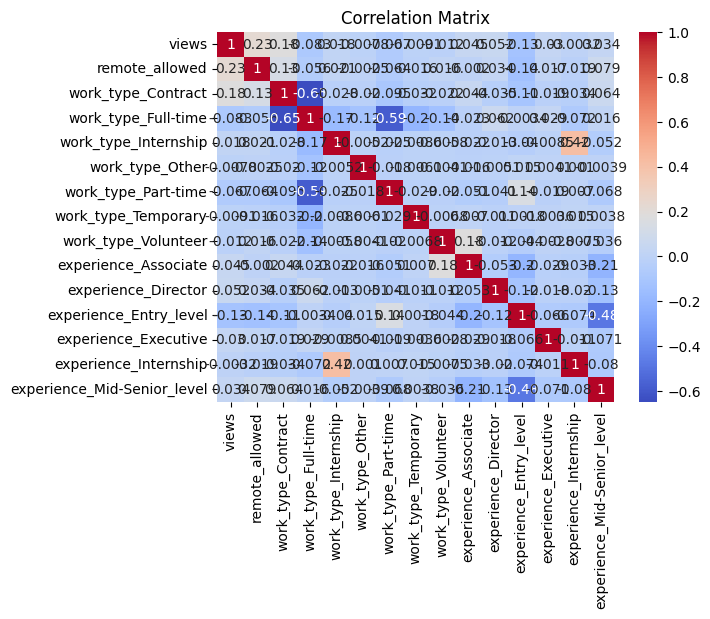

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

                       Variable       VIF
0                         views  1.092167
1                remote_allowed  1.079466
2            work_type_Contract  1.458194
3           work_type_Full-time  4.255410
4          work_type_Internship  1.242190
5               work_type_Other  1.015380
6           work_type_Part-time  1.359651
7           work_type_Temporary  1.042755
8           work_type_Volunteer  1.058534
9          experience_Associate  1.296743
10          experience_Director  1.114168
11       experience_Entry_level  1.730633
12         experience_Executive  1.036673
13        experience_Internship  1.251232
14  experience_Mid-Senior_level  1.702494


In [0]:

# Correlation matrix
corr_matrix = pandas_df3.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Variance Inflation Factor
X = pandas_df3  # Replace with your features
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


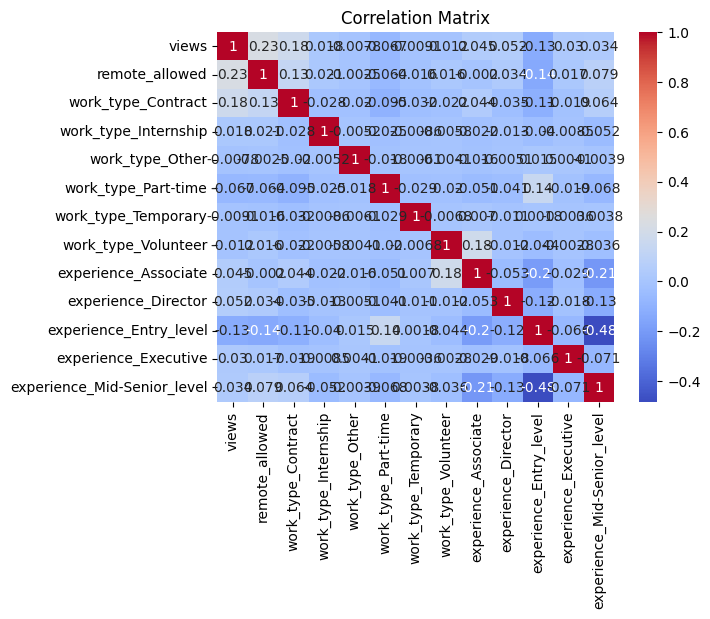

In [0]:

# Correlation matrix
corr_matrix = pandas_df4.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [0]:
X = pandas_df4  # Replace with your features
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

                       Variable       VIF
0                         views  1.317146
1                remote_allowed  1.194458
2            work_type_Contract  1.151000
3          work_type_Internship  1.004783
4               work_type_Other  1.003879
5           work_type_Part-time  1.100979
6           work_type_Temporary  1.009771
7           work_type_Volunteer  1.040542
8          experience_Associate  1.088076
9           experience_Director  1.023003
10       experience_Entry_level  1.125849
11         experience_Executive  1.007504
12  experience_Mid-Senior_level  1.186783


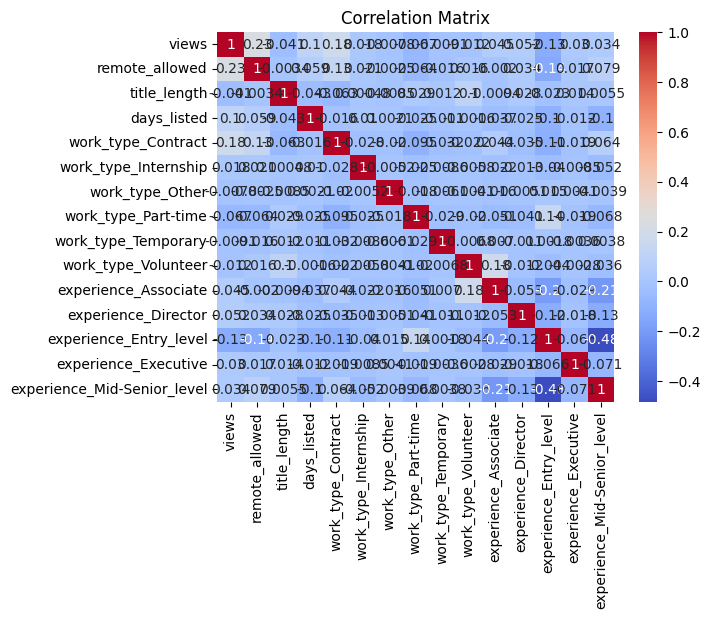

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

                       Variable       VIF
0                         views  1.378458
1                remote_allowed  1.212732
2                  title_length  3.286800
3                   days_listed  2.294711
4            work_type_Contract  1.155817
5          work_type_Internship  1.015389
6               work_type_Other  1.004504
7           work_type_Part-time  1.117419
8           work_type_Temporary  1.011899
9           work_type_Volunteer  1.049622
10         experience_Associate  1.216324
11          experience_Director  1.086998
12       experience_Entry_level  1.700690
13         experience_Executive  1.027125
14  experience_Mid-Senior_level  1.803198


In [0]:

# Correlation matrix
corr_matrix = pandas_df5.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Variance Inflation Factor
X = pandas_df5  # Replace with your features
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

In [0]:
pandas_df5.head()

,views,remote_allowed,title_length,days_listed,work_type_Contract,work_type_Internship,work_type_Other,work_type_Part-time,work_type_Temporary,work_type_Volunteer,experience_Associate,experience_Director,experience_Entry_level,experience_Executive,experience_Mid-Senior_level
0,21.0,0.0,32,30,0,0,0,0,0,0,0,0,0,0,1
1,7.0,0.0,22,30,0,0,0,0,0,0,0,0,0,0,0
2,16.0,0.0,17,29,0,0,0,0,0,0,0,0,0,0,1
3,5.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,1
4,6.0,0.0,27,30,0,0,0,0,0,0,0,0,1,0,0


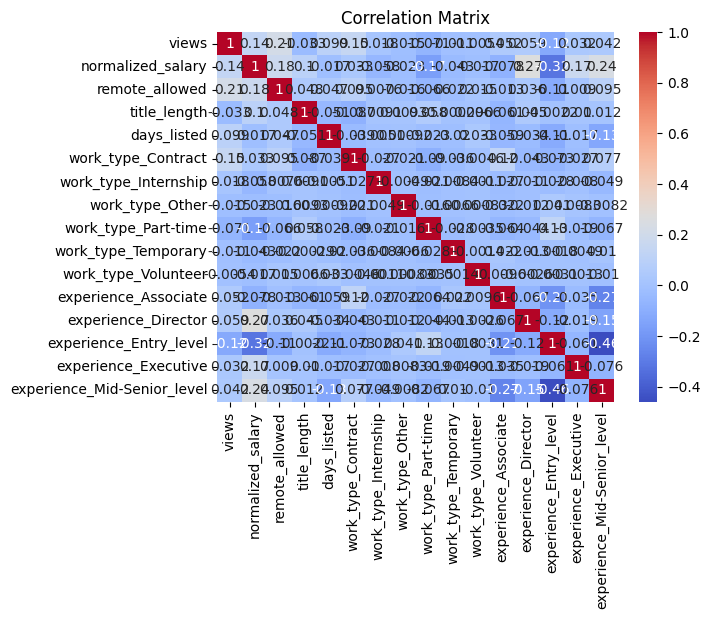

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

                       Variable       VIF
0                         views  1.407656
1             normalized_salary  4.402668
2                remote_allowed  1.242585
3                  title_length  3.977729
4                   days_listed  2.146905
5            work_type_Contract  1.183826
6          work_type_Internship  1.012873
7               work_type_Other  1.007347
8           work_type_Part-time  1.109127
9           work_type_Temporary  1.015209
10          work_type_Volunteer  1.002197
11         experience_Associate  1.306566
12          experience_Director  1.274261
13       experience_Entry_level  1.657825
14         experience_Executive  1.092820
15  experience_Mid-Senior_level  2.370180


In [0]:
# Correlation matrix
corr_matrix = pandas_df6.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Variance Inflation Factor
X = pandas_df6  # Replace with your features
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Notes: 
- Not use the normalized salary dataset because there is a high level VIF value for normalized salary

# PCA for model views dataset with 10 components

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pandas_df5)

# Convert back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=pandas_df5.columns)
scaled_df.head()



,views,remote_allowed,title_length,days_listed,work_type_Contract,work_type_Internship,work_type_Other,work_type_Part-time,work_type_Temporary,work_type_Volunteer,experience_Associate,experience_Director,experience_Entry_level,experience_Executive,experience_Mid-Senior_level
0,0.558871,-0.356823,0.021100,-0.154599,-0.323037,-0.086013,-0.060886,-0.293647,-0.09953,-0.068009,-0.294613,-0.178553,-0.669273,-0.098913,1.38756
1,-0.154198,-0.356823,-0.595419,-0.154599,-0.323037,-0.086013,-0.060886,-0.293647,-0.09953,-0.068009,-0.294613,-0.178553,-0.669273,-0.098913,-0.72069
2,0.304204,-0.356823,-0.903678,-0.197523,-0.323037,-0.086013,-0.060886,-0.293647,-0.09953,-0.068009,-0.294613,-0.178553,-0.669273,-0.098913,1.38756
3,-0.256065,-0.356823,-0.102204,-0.154599,-0.323037,-0.086013,-0.060886,-0.293647,-0.09953,-0.068009,-0.294613,-0.178553,-0.669273,-0.098913,1.38756
4,-0.205131,-0.356823,-0.287159,-0.154599,-0.323037,-0.086013,-0.060886,-0.293647,-0.09953,-0.068009,-0.294613,-0.178553,1.494158,-0.098913,-0.72069


In [0]:
%python
from sklearn.decomposition import PCA
import pandas as pd

# Initialize PCA
pca = PCA(n_components=10)  # Choose the number of components

# Fit PCA
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10'])

# Add original columns for context (optional)
pca_df = pd.concat([pca_df, pandas_df5.reset_index(drop=True)], axis=1)

print(pca_df.head())


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

        PC1       PC2  ...  experience_Executive  experience_Mid-Senior_level
0  1.000163 -1.041491  ...                     0                            1
1 -0.167671  0.007063  ...                     0                            0
2  0.940445 -1.119200  ...                     0                            1
3  0.708164 -1.260164  ...                     0                            1
4 -1.450067  0.183323  ...                     0                            0

[5 rows x 25 columns]


In [0]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,views,remote_allowed,title_length,days_listed,work_type_Contract,work_type_Internship,work_type_Other,work_type_Part-time,work_type_Temporary,work_type_Volunteer,experience_Associate,experience_Director,experience_Entry_level,experience_Executive,experience_Mid-Senior_level
0,1.000163,-1.041491,0.421288,0.021079,0.155970,-0.097421,-0.058538,0.058995,-0.062915,-0.194602,21.0,0.0,32,30,0,0,0,0,0,0,0,0,0,0,1
1,-0.167671,0.007063,-0.044129,-0.103414,0.407464,0.336600,-0.083385,0.118969,0.146255,-0.522414,7.0,0.0,22,30,0,0,0,0,0,0,0,0,0,0,0
2,0.940445,-1.119200,0.173508,-0.376098,0.441020,0.186786,-0.129485,0.165483,0.057478,-0.567357,16.0,0.0,17,29,0,0,0,0,0,0,0,0,0,0,1
3,0.708164,-1.260164,0.659296,-0.061545,0.306230,0.004301,-0.101764,0.139956,0.017925,-0.369645,5.0,0.0,30,30,0,0,0,0,0,0,0,0,0,0,1
4,-1.450067,0.183323,-0.583780,-0.295216,-0.009397,0.256150,0.025219,-0.015441,0.161548,0.139386,6.0,0.0,27,30,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116417,0.628925,-1.314713,0.776917,-0.018868,0.298877,-0.011531,-0.101803,0.145916,0.025322,-0.356254,1.0,0.0,32,30,0,0,0,0,0,0,0,0,0,0,1
116418,1.786386,-0.800274,0.234184,0.641116,-0.586663,-0.812624,0.103854,-0.111491,-0.224798,0.941882,3.0,1.0,44,30,0,0,0,0,0,0,0,0,0,0,1
116419,1.806348,-0.800653,0.048206,0.438452,-0.442925,-0.680582,0.069398,-0.065797,-0.183797,0.758995,3.0,1.0,36,30,0,0,0,0,0,0,0,0,0,0,1
116420,0.911952,0.452913,-0.637439,0.394585,-0.334545,-0.343990,0.085613,-0.082438,-0.051055,0.598144,4.0,1.0,28,30,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(pca_df)
spark_df.display()
# Saved model_data_final_views as new Delta table
# spark_df.write.format("delta").mode("overwrite").saveAsTable("default.model_data_final_views_pca10")

In [0]:
# Save the DataFrame as a Delta table with schema evolution enabled
spark_df.write.format("delta") \
    .mode("overwrite") \
    .saveAsTable("default.model_data_final_views_pca10_v2")

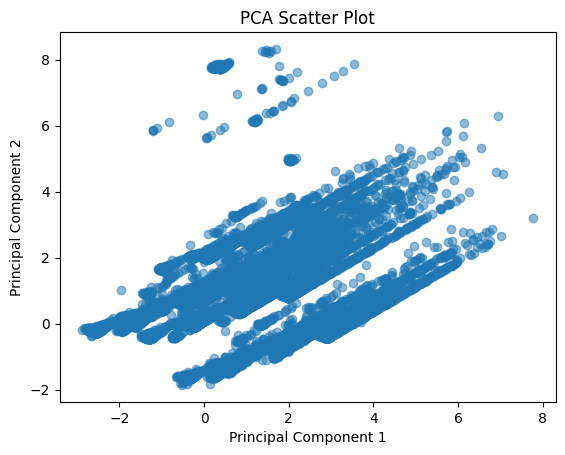

In [0]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


In [0]:
%python
import pandas as pd

# Assuming pca_result is the PCA-transformed dataset and target_variable is available
target_variable = pandas_df5["views"]  # Replace with the actual target variable data
df2 = pd.DataFrame()  # Initialize df2 as an empty DataFrame
df2['PC1'] = pca_result[:, 0]  # First principal component
df2['PC2'] = pca_result[:, 1]  # Second principal component
df2['PC3'] = pca_result[:, 2]
df2['PC4'] = pca_result[:, 3]
df2['PC5'] = pca_result[:, 4]
df2['PC6'] = pca_result[:, 5]
df2['PC7'] = pca_result[:, 6]
df2['PC8'] = pca_result[:, 7]
df2['views'] = target_variable  # Add the target variable

# Retain only PCA columns and the target variable
df2 = df2[['PC1', 'PC2', 'PC3', 'PC4','PC4', 'PC6','PC7', 'PC8','views']]
display(df2)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split data
X = df2[['PC1', 'PC2', 'PC3', 'PC4','PC4', 'PC6','PC7', 'PC8']]
y = df2['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

R² Score: 0.4966070880996276
RMSE: 13.81632451813144
MAE: 7.7551472777466035


## Checking of PCA Components

In [0]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming 'scaled_data' is your standardized dataset
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Explained Variance Ratio: [0.11509008 0.08777396 0.08295214 0.0733072  0.06914627 0.06857532
 0.06773655 0.06695598 0.06625415 0.06560891 0.06001518 0.05583567
 0.05252874 0.04967502 0.01854483]
Cumulative Variance: [0.11509008 0.20286404 0.28581618 0.35912338 0.42826965 0.49684497
 0.56458152 0.6315375  0.69779164 0.76340055 0.82341573 0.87925141
 0.93178015 0.98145517 1.        ]


In [0]:
# Find the number of components to explain 95% of the variance
target_variance = 0.60
num_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f"Number of components to explain {target_variance * 100}% variance: {num_components}")


Number of components to explain 60.0% variance: 8


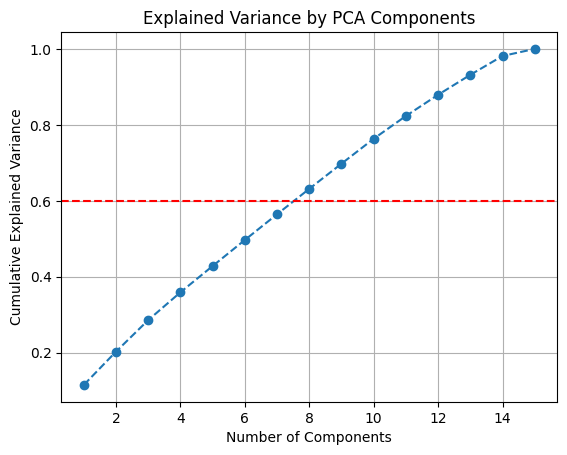

In [0]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.60, color='r', linestyle='--')  
plt.grid()
plt.show()
